# Risk Assignment 
### Author Andre Hoarau
<p align="center">
<img src ="https://i2.pickpik.com/photos/192/49/172/risk-word-letters-boggle-preview.jpg"
</p>

The task is to simulate 1000 individual battle rounds in risk with 3 attackers and 2 defenders and plot the results.
The rules:
    In Risk one army fights another. (using 6 sided dice)

    In each battle round, the attacker can put forward up to three of their troops (3 dice).

    The defender can use up to two of their defending troops (2 dice).

    Each side looses troops depending on the following rules:

    The two top dice dice are compared (ie the attackers top dice roll with the defenders top dice roll) 
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)
    The next two highest dice from each side are then compared (ie the attackers second highest to the defenders second highest)
    If the attackers dice is the same or lower they loose one troop otherwise the defender looses a troop (ie if the attackers dice is higher)

In [101]:
# Lets import the packages we will use.
import numpy as np
import matplotlib.pyplot as plt
# Lets make an array for the attacker roll.
attack_roll = np.random.randint(1,7, size= [1000,3])
# Similarily we can make an array for the defender roll
defend_roll = np.random.randint(1,7, size= [1000,2])
'''print (attack_roll[:20]) 
print (defend_roll[:20])'''

'print (attack_roll[:20]) \nprint (defend_roll[:20])'

In [99]:
# Now I need to compare the 2 arrays and determine the results
max_attack_value1= np.max(attack_roll, axis= 1)

# Sorted each row in the array in descending order as I have done below and selected the first and second elements.
max_attack_value2 = np.sort(attack_roll,axis=1)[:,-2]

# We can replicate for the defender rolls
max_defend_value1 =  np.max(defend_roll, axis= 1)
max_defend_value2 = np.sort(defend_roll,axis=1)[:,-2]

attack_loses = 0
defend_loses = 0
# We then need to determine what dice rolls are winning.
defend_loses1 = (max_attack_value1 > max_defend_value1).astype(int)
attack_loses1 = (max_attack_value1 < max_defend_value1).astype(int)

defend_loses2 = (max_attack_value2 > max_defend_value2).astype(int)
attack_loses2 = (max_attack_value2 <= max_defend_value2).astype(int)
# Sum up the losses for each row
attack_loses_per_row = attack_loses1 + attack_loses2
defend_loses_per_row = defend_loses1 + defend_loses2

# Print results for each row
for i in range(len(attack_loses_per_row)):
    print(f"Row {i + 1}: Attack Loses = {attack_loses_per_row[i]}, Defend Loses = {defend_loses_per_row[i]}")



Row 1: Attack Loses = 2, Defend Loses = 0
Row 2: Attack Loses = 2, Defend Loses = 0
Row 3: Attack Loses = 1, Defend Loses = 1
Row 4: Attack Loses = 2, Defend Loses = 0
Row 5: Attack Loses = 2, Defend Loses = 0
Row 6: Attack Loses = 1, Defend Loses = 0
Row 7: Attack Loses = 2, Defend Loses = 0
Row 8: Attack Loses = 1, Defend Loses = 1
Row 9: Attack Loses = 0, Defend Loses = 2
Row 10: Attack Loses = 0, Defend Loses = 2
Row 11: Attack Loses = 2, Defend Loses = 0
Row 12: Attack Loses = 0, Defend Loses = 1
Row 13: Attack Loses = 1, Defend Loses = 1
Row 14: Attack Loses = 1, Defend Loses = 0
Row 15: Attack Loses = 2, Defend Loses = 0
Row 16: Attack Loses = 1, Defend Loses = 1
Row 17: Attack Loses = 2, Defend Loses = 0
Row 18: Attack Loses = 2, Defend Loses = 0
Row 19: Attack Loses = 1, Defend Loses = 1
Row 20: Attack Loses = 0, Defend Loses = 2
Row 21: Attack Loses = 0, Defend Loses = 2
Row 22: Attack Loses = 0, Defend Loses = 2
Row 23: Attack Loses = 1, Defend Loses = 1
Row 24: Attack Loses

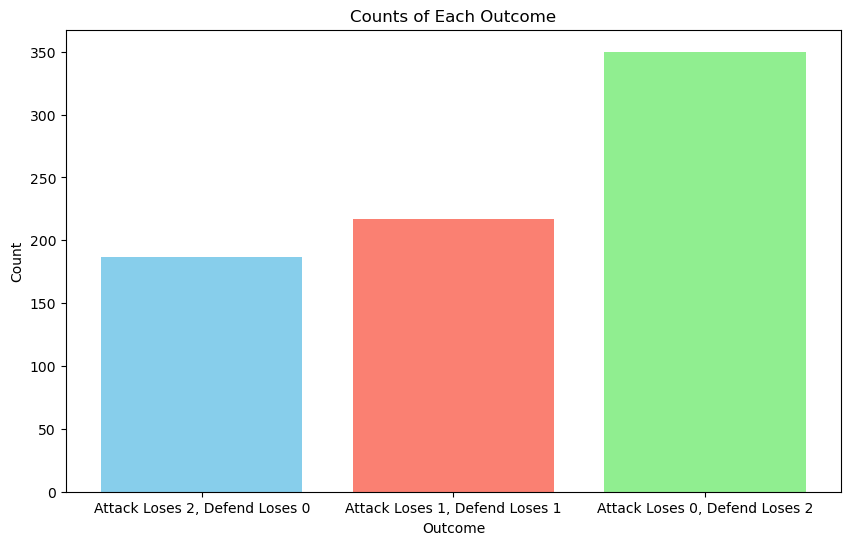

In [102]:
# Create a 2-d array of the attack loses and defend loses 
results = np.column_stack((attack_loses_per_row, defend_loses_per_row))

# Get the count of each outcome
count_attack_2_defend_0 = np.sum((results[:, 0] == 2) & (results[:, 1] == 0))
count_attack_1_defend_1 = np.sum((results[:, 0] == 1) & (results[:, 1] == 1))
count_attack_0_defend_2 = np.sum((results[:, 0] == 0) & (results[:, 1] == 2))

# Labels for the x-axis
outcomes = ['Attack Loses 2, Defend Loses 0', 'Attack Loses 1, Defend Loses 1', 'Attack Loses 0, Defend Loses 2']
# Counts for each outcome
counts = [count_attack_2_defend_0, count_attack_1_defend_1, count_attack_0_defend_2]

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(outcomes, counts, color=['skyblue', 'salmon', 'lightgreen'])

# Add title and labels
plt.title('Counts of Each Outcome')
plt.xlabel('Outcome')
plt.ylabel('Count')

# Show the plot
plt.show()

NOTE TO ANDRE FOR FUTURE DO THE EXTRA BIT IN THE ASSIGNMENT FOR LOSING TROOPS 
ALSO ADD SOME NOTES ABOUT HOW IT COMPARES TO STATISTICS AS IT SEEMS QUITE COOL.

Resources: 
* https://stackoverflow.com/questions/12090472/how-do-i-center-an-image-in-the-readme-md-file-on-github- how to put in an image and centre it in markdown.
* https://stackoverflow.com/questions/69731158/best-way-to-loop-through-randomly-generated-array - how to generate the arrays 
* https://stackoverflow.com/questions/69731158/best-way-to-loop-through-randomly-generated-array - article on how to use sort after the initial max
* Chat GPT helped direct me to the element wise comparisons notes are also available here: https://note.nkmk.me/en/python-numpy-ndarray-compare/